In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
##REad the dataset
df=pd.read_csv('height-weight.csv')

In [3]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

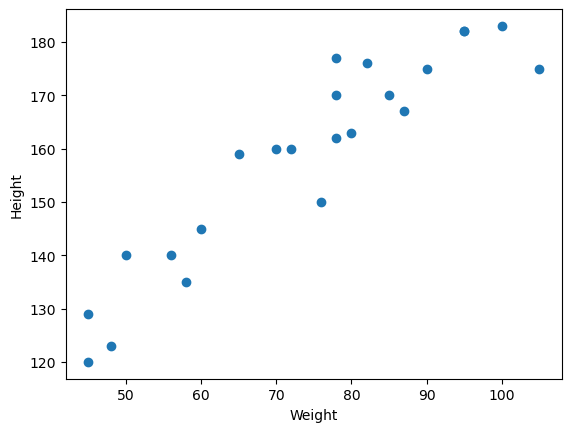

In [5]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")

In [6]:
##divide our dataset into independent and dependent features
X=df['Weight']
y=df['Height']

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [8]:
y_train

12    175
1     135
13    183
5     162
2     123
11    182
20    129
3     145
4     160
18    150
16    140
21    140
22    160
7     175
10    176
14    170
19    167
6     163
Name: Height, dtype: int64

In [9]:
y_test

15    177
9     170
0     120
8     182
17    159
Name: Height, dtype: int64

In [16]:
X_train.dtypes


dtype('int64')

In [20]:
## Standardize the dataset

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train = scaler.fit_transform(X_train.values.reshape(-1, 1))
X_test  = scaler.transform(X_test.values.reshape(-1, 1))
# X_train=scaler.fit_transform(X_train )
# X_test=scaler.transform(X_test)

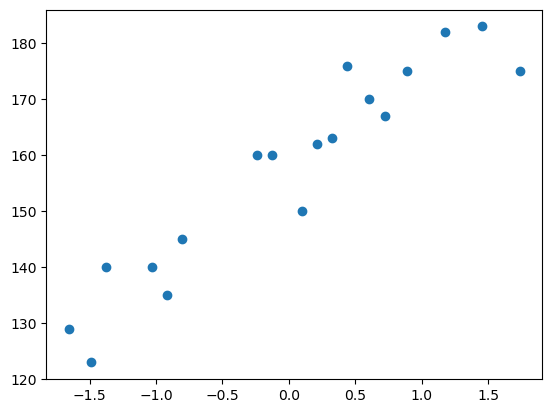

In [21]:
plt.scatter(X_train,y_train)

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
regressor=LinearRegression()

In [24]:
regressor

LinearRegression()

In [25]:
type(X_train)

numpy.ndarray

In [26]:
X_train=np.array(X_train).reshape(-1,1)
X_test=np.array(X_test).reshape(-1,1)

In [27]:
y_train.shape

(18,)

In [28]:
regressor.fit(X_train,y_train)

LinearRegression()

In [29]:
## coefficient and intercepts
print("Coefficient : ",regressor.coef_)
print("Intercept : ",regressor.intercept_)

Coefficient :  [17.03440872]
Intercept :  157.5


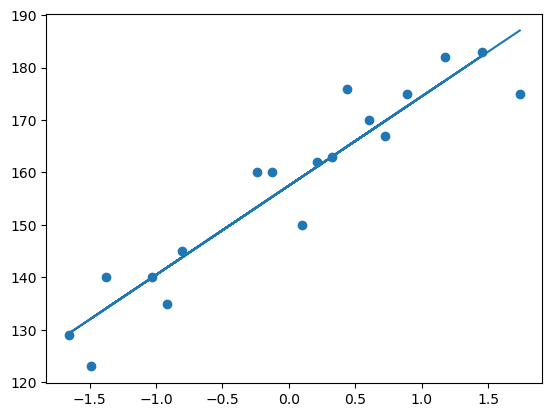

In [30]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train))

### prediction of train data
1. predicted height output= intercept +coef_(Weights)
2. y_pred_train =65.4364 + 1.26(X_train)
          
### prediction of test data
1. predicted height output= intercept +coef_(Weights)
2. y_pred_test =65.4364 + 1.26(X_test)

In [31]:
y_pred_test=regressor.predict(X_test)


In [32]:
y_test

15    177
9     170
0     120
8     182
17    159
Name: Height, dtype: int64

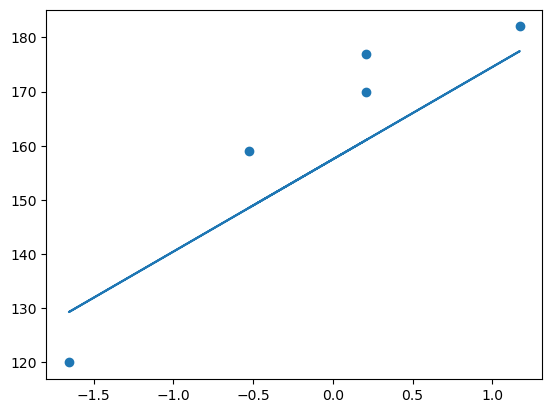

In [33]:
plt.scatter(X_test,y_test)
plt.plot(X_test,regressor.predict(X_test))

In [34]:
### Performance metrics

from sklearn.metrics import mean_squared_error,mean_absolute_error

In [35]:
mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

109.77592599051664
9.822657814519232
10.477400726827081


In [42]:
from sklearn.metrics import r2_score
#r2_score=1-(rss/tss)
score=r2_score(y_test,y_pred_test)

In [37]:
print(score)

0.776986986042344


## R square 
Formula

**R^2 = 1 - SSR/SST**


R^2	=	coefficient of determination
SSR	=	sum of squares of residuals
SST	=	total sum of squares

In [39]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred_test)
print(score)

0.776986986042344


**Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]**

where:

R2: The R2 of the model
n: The number of observations
k: The number of predictor variables

In [40]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7026493147231252

In [43]:
regressor.predict(scaler.transform([[75]]))

array([158.19553315])

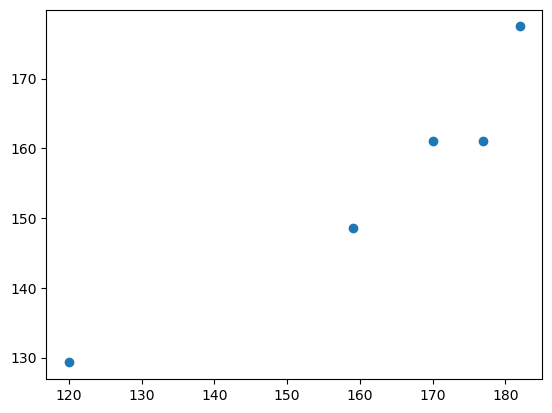

In [44]:
## Assumptions

## plot a scatter plot for the prediction
plt.scatter(y_test,y_pred_test)



In [45]:
## Residuals
residuals=y_test-y_pred_test

residuals



15    15.915329
9      8.915329
0     -9.304156
8      4.543549
17    10.434926
Name: Height, dtype: float64

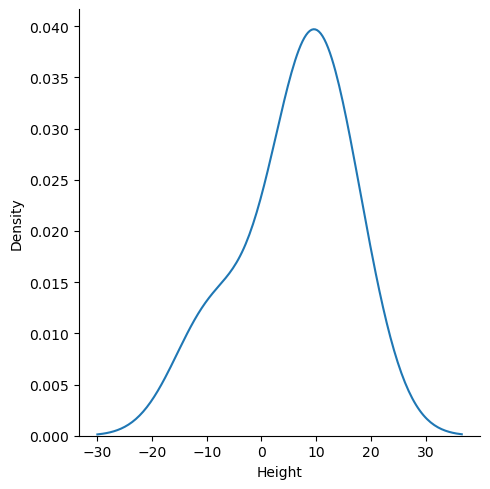

In [48]:
## Plot this residuals 
import seaborn as sns
sns.displot(residuals,kind="kde")



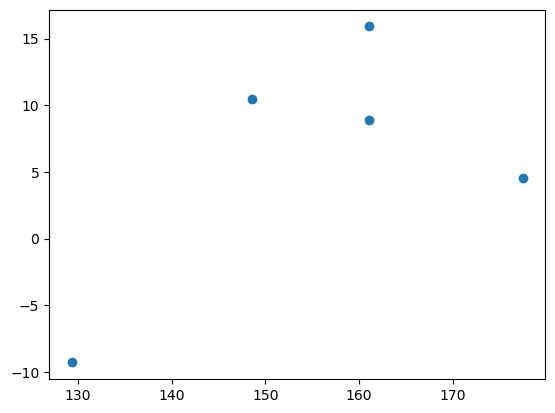

In [49]:
## Scatter plot with respect to prediction and residuals
## uniform distribution
plt.scatter(y_pred_test,residuals)

## Using OLS

In [50]:
import statsmodels.api as sm

In [54]:
model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_test) 
predictions

array([  3.58467086,   3.58467086, -28.1958439 ,  19.95645118,
        -8.93492586])

In [52]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.047
Method:                 Least Squares   F-statistic:                             0.1986
Date:                Sun, 14 Dec 2025   Prob (F-statistic):                       0.661
Time:                        12:00:26   Log-Likelihood:                         -116.62
No. Observations:                  18   AIC:                                      235.2
Df Residuals:                      17   BIC:                                      236.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\KUMAR G\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [53]:
regressor.coef_

array([17.03440872])